# Optional Assignment $\mathbb 1$

## Statement
Given the IVP $u' = f(u, t) = \cfrac{u^2+u}{t}$ 
over the interval $t \in [1, 5]$ with initial value $u(1) = -2$, we are asked to appoximate...

We know that the solution to this ODE is $u(t) = \cfrac{2t}{1-2t}$

Import libraries

In [15]:
import math, matplotlib.pyplot as plt

Define functions

In [16]:
def exact_solution(u: callable, a: float, b: float, k: float) -> float:
    """Computes the exact solution of the IVP"""
    N = math.ceil((b-a)/k) + 1
    k = (b-a)/N
    
    y = []
    for i in range(N):
        y.append(u(a+i*k))
    return y

def newton_method(f: callable, f_prime: callable, u0: float, tolerance: float, max_iterations: int) -> float:
    """Newton's Method to find the root of a function"""
    u1 = u0
    for _ in range(max_iterations):
        fu = f(u1)
        fpu = f_prime(u1)
        # Avoid division by zero
        if abs(fpu) < tolerance:  
            raise ValueError("Derivative is too small; method fails.")
        u_new = u1 - fu / fpu
        # Check for convergence
        if abs(u_new - u1) < tolerance:  
            return u_new
        u1 = u_new
    raise ValueError("Method did not converge within the maximum iterations.")

In [17]:
def forward_euler(f: callable, a: float, b: float, k: float, u0: float) -> list[float]:
  """Forward Euler Method"""
  N = math.ceil((b-a)/k) + 1
  k = (b-a)/N

  u = [u0]
  ui, ti = u0, a
  for _ in range(N-1):
    ui, ti = ui + k*f(ui, ti), ti+k
    u.append(ui)

  return u

def backward_euler(f: callable, f_prime: callable, a: float, b: float, k: float, u0: float, tolerance=0.0001, max_iterations=10) -> list[float]:
  """Backward Euler Method"""
  N = math.ceil((b-a)/k) + 1
  k = (b-a)/N

  u = [u0]
  ui, ti = u0, a
  for _ in range(N-1):
    ui, ti = newton_method(lambda x: x-ui-k*f(x,ti+k), lambda x: 1-k*f_prime(x,ti+k), ui, tolerance, max_iterations), ti+k
    u.append(ui)
  return u

def explicit_trapezoidal(f: callable, a: float, b: float, k: float, u0: float) -> list[float]:
  """Explicit Trapezoidal Runge-Kutta 2 Method"""
  N = math.ceil((b-a)/k) + 1
  k = (b-a)/N

  u = [u0]
  ui, ti = u0, a
  for _ in range(N-1):
    aux_u = ui + k*f(ui, ti)
    ui, ti = ui + (k/2)*(f(ui, ti) + f(aux_u, ti+k)), ti+k
    u.append(ui)

  return u

def explicit_midpoint(f: callable, a: float, b: float, k: float, u0: float) -> list[float]:
  """Explicit Midpoint Runge-Kutta 2 Method"""
  N = math.ceil((b-a)/k) + 1
  k = (b-a)/N

  u = [u0]
  ui, ti = u0, a
  for _ in range(N-1):
    aux_u = ui + (k/2)*f(ui, ti)
    ui, ti = ui + k*f(aux_u, ti + k/2), ti+k
    u.append(ui)
  return u

def heun_rk3(f: callable, a: float, b: float, k: float, u0: float) -> list[float]:
  """Heun's Runge-Kutta 3 Method"""
  N = math.ceil((b-a)/k) + 1
  k = (b-a)/N

  u = [u0]
  ui, ti = u0, a
  for _ in range(N-1):
    f1, f2 = f(ui, ti), f(ui + k*f(ui, ti), ti+k)
    ui, ti = ui + (k/2)*(f1+f2), ti+k
    u.append(ui)
  return u

def rk4(f: callable, a: float, b: float, k: float, u0: float) -> list[float]:
  """Standard Runge-Kutta 4 Method"""
  N = math.ceil((b-a)/k) + 1
  k = (b-a)/N

  u = [u0]
  ui, ti = u0, a
  for _ in range(N-1):
    y1 = ui 
    y2 = ui + (k/2)*f(y1, ti)
    y3 = ui + (k/2)*f(y2, ti+k/2)
    y4 = ui + k*f(y3, ti+k/2)
    f1, f2, f3, f4 = f(y1, ti), f(y2, ti + k/2), f(y3, ti+k/2), f(y4, ti+k)
    ui, ti = ui + (k/6)*(f1+2*f2+2*f3+f4), ti+k
    u.append(ui)
  return u

## Resolution

In [56]:
# Definition of the IVP problem and initial values
f = lambda u,t: (u**2+u)/t
f_prime = lambda u,t: (2*u+1)/t
u = lambda t: (2*t)/(1-2*t)
delta = lambda k: 1/(5*2**k)
a, b, k, u0 = 1, 5, delta(6), -2

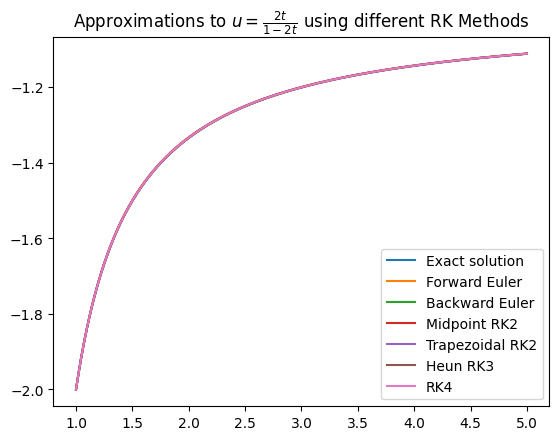

In [57]:
# Compute the solutions using the different methods
x_points = [a+k*i for i in range(math.ceil((b-a)/k)+1)]

y_points = exact_solution(u, a, b, k)
y_feuler = forward_euler(f, a, b, k, u0)
y_beuler = backward_euler(f, f_prime, a, b, k, u0, tolerance=0.0001, max_iterations=10)
y_midpoint = explicit_midpoint(f, a, b, k, u0)
y_trapezoid = explicit_trapezoidal(f, a, b, k, u0)
y_heun = heun_rk3(f, a, b, k, u0)
y_rk4 = rk4(f, a, b, k, u0)

plt.plot(x_points, y_points, label='Exact solution')
plt.plot(x_points, y_feuler, label='Forward Euler')
plt.plot(x_points, y_beuler, label='Backward Euler')
plt.plot(x_points, y_midpoint, label='Midpoint RK2')
plt.plot(x_points, y_trapezoid, label='Trapezoidal RK2')
plt.plot(x_points, y_heun, label='Heun RK3')
plt.plot(x_points, y_rk4, label='RK4')
plt.title("Approximations to $u = \\frac{2t}{1-2t}$ using different RK Methods")
plt.legend()
plt.show()

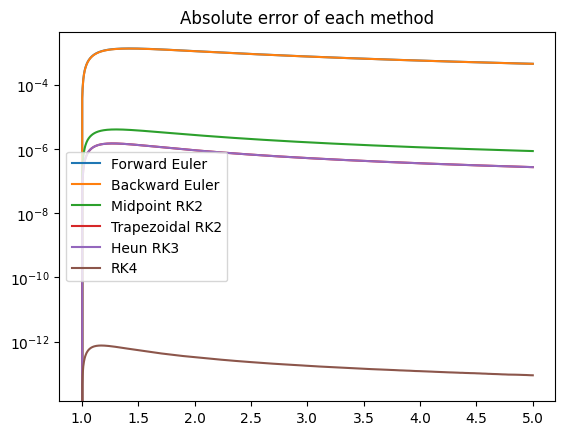

In [58]:
abs_error = lambda u, v: [abs(u[i]-v[i]) for i in range(len(u))] 

plt.semilogy(x_points, abs_error(y_points, y_feuler), label='Forward Euler')
plt.semilogy(x_points, abs_error(y_points, y_beuler), label='Backward Euler')
plt.semilogy(x_points, abs_error(y_points, y_midpoint), label='Midpoint RK2')
plt.semilogy(x_points, abs_error(y_points, y_trapezoid), label='Trapezoidal RK2')
plt.semilogy(x_points, abs_error(y_points, y_heun), label='Heun RK3')
plt.semilogy(x_points, abs_error(y_points, y_rk4), label='RK4')
plt.title("Absolute error of each method")
plt.legend()
plt.show()


-1.1111111111111112 -1.1111882649075602


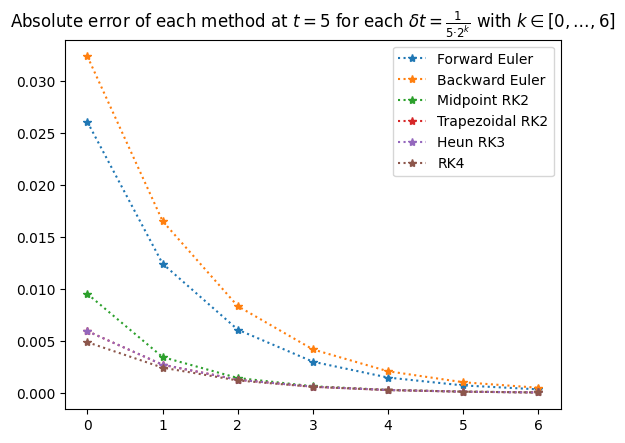

In [ ]:
matrix = [[] for _ in range(6)]
for i in range(7):
    k = delta(i)
    x_points = [a+k*i for i in range(math.ceil((b-a)/k)+1)]
    exact = u(5)
    y_feuler = forward_euler(f, a, b, k, u0)
    y_beuler = backward_euler(f, f_prime, a, b, k, u0, tolerance=0.0001, max_iterations=10)
    y_midpoint = explicit_midpoint(f, a, b, k, u0)
    y_trapezoid = explicit_trapezoidal(f, a, b, k, u0)
    y_heun = heun_rk3(f, a, b, k, u0)
    y_rk4 = rk4(f, a, b, k, u0)

    points = [
        y_feuler[-1],
        y_beuler[-1],
        y_midpoint[-1],
        y_trapezoid[-1],
        y_heun[-1],
        y_rk4[-1],
    ]
    for j in range(6):
        matrix[j].append(abs(points.pop(0)-exact))

labels = ['Forward Euler', 'Backward Euler', 'Midpoint RK2', 'Trapezoidal RK2', 'Heun RK3', 'RK4']
for i, label in enumerate(labels):
    plt.plot([j for j in range(7)], matrix[i], '*:', label=label)

plt.legend()
plt.title("Absolute error of each method at $t=5$ for each $\\delta t = \\frac{1}{5·2^k}$ with $k\\in[0, \\ldots, 6]$")
plt.show()

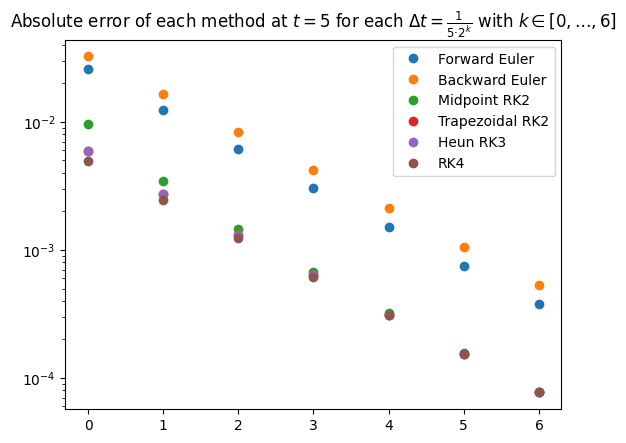

In [55]:
labels = ['Forward Euler', 'Backward Euler', 'Midpoint RK2', 'Trapezoidal RK2', 'Heun RK3', 'RK4']
for i, label in enumerate(labels):
    plt.semilogy([j for j in range(7)], matrix[i], 'o', label=label)

plt.legend()
plt.title("Absolute error of each method at $t=5$ for each $\\Delta t = \\frac{1}{5·2^k}$ with $k\\in[0, \\ldots, 6]$")
plt.show()

Notice how the error in this graph (4) is bigger than in the graph (2). This is because the value of the function $u$ is evaluated at different times due to rounding errors. See that the values below differ slightly when both are supposed to be evalueated at $t=5$

In [60]:
print(u(b), exact_solution(u, a, b, k)[-1])

-1.1111111111111112 -1.1111882649075602
